# Today, we will be talking about Pandas
**Note**: content adapted from [here](https://github.com/arunabh15091989/LighthouseLabs-LectureNotes/tree/master/W2D2)

## What is it?
- A Python package for working with **tables** 
- Similar to Excel and SQL
    - Faster (exists in memory on your computer)
    - More features to manipiulate, transform, and aggregate data
- Intuitive API (imperative, squential statements)
- Seamless integration with other Python packages (e.g. Machine Learning packages)
- Seamless integration with other data formats (.csv, SQL, HDF5, standard Python data types)

# Motivation
Think of how you would represent a table with column names in Python normally. Perhaps...

### A dictionary of lists
- Columns are keys
- Rows are index in the list

In [38]:
students = {
    'student_id': [1412, 94, 9351, 14],
    'name': ['Bonnie', 'Eric', 'Lynxi', 'Gad'],
    'course_mark': [82, 100, 12, 76],
    'species': ['human', 'human', 'cat', 'human']
}

### What are some operations we might want to do on this data?
1. Select a subset of columns
2. Filter out some rows based on an attribute
3. Group by some attribute
4. Compute some aggregate values within groups
5. Save to a file

How about we try out one of these to see how easy it is.

In [39]:
# Return a table with the mean course mark per-species

species_sums = {}
species_counts = {}
for i in range(len(students['species'])):
    species = students['species'][i]
    course_mark = students['course_mark'][i]
    if species not in species_sums:
        species_sums[species] = 0
        species_counts[species] = 0
    species_sums[species] += course_mark
    species_counts[species] += 1

species_means = {}
for species in species_sums:
    species_means[species] = species_sums[species] / species_counts[species]

species_means

{'human': 86.0, 'cat': 12.0}

### Doing it in Pandas
Was the above fun? Do you find the code elegant? Easy to understand and write?

Luckily, the Pandas package exists to make our lives easier. Let's write the exact same code,
but using Pandas.

In [40]:
# Return a table with the mean course mark per-species

import pandas as pd        # To not have to write 'pandas' in full every time

students = pd.DataFrame(students)    # Can take in a dictionary of lists to instantiate a DataFrame
students

,student_id,name,course_mark,species
0,1412,Bonnie,82,human
1,94,Eric,100,human
2,9351,Lynxi,12,cat
3,14,Gad,76,human


In [41]:
species_means = students[['species', 'course_mark']].groupby('species').mean()
species_means

,course_mark
species,
cat,12
human,86


### Let's dissect the above a bit more

In [42]:
# Step 1: Filter out the columns we want to keep
students_filtered = students[['species', 'course_mark']]
students_filtered

,species,course_mark
0,human,82
1,human,100
2,cat,12
3,human,76


In [43]:
## Step 2: Group by the species column
students_grouped_by_species = students_filtered.groupby('species')
students_grouped_by_species

In [44]:
# Step 3: Specify how to aggregate the course_mark column
species_means = students_grouped_by_species.mean()
species_means

,course_mark
species,
cat,12
human,86


### As shown, Pandas makes use of **vectorized** operations
- Rather than use for-loops, we specify the operation that will apply to the structure as a whole (i.e. all the rows)
- By vectorizing, the code becomes more concise and more readable
- Pandas is optimized for vectorized operations (parallel vs. serial computation), which makes them **much faster**
- It is almost always possible to vectorize operations on Pandas data types

# The basics of Pandas

### Data structures
There are two data types of interest:
- Series (column)
- DataFrame (table)

In [45]:
# One way to construct a Series
series = pd.Series([10, 8, 62, 3], index=[94, 9351, 14, 1412])   # Optionally, can pass 'index' (row labels). Default will be 0, 1, 2, etc.
series

94      10
9351     8
14      62
1412     3
dtype: int64

In [46]:
# One way to construct a DataFrame
df = pd.DataFrame({
    'name': ['Bonnie', 'Eric', 'Lynxi', 'Gad'],
    'course_mark': [82, 100, 12, 76],
    'species': ['human', 'human', 'cat', 'human']},
    index=[1412, 94, 9351, 14])
df

,name,course_mark,species
1412,Bonnie,82,human
94,Eric,100,human
9351,Lynxi,12,cat
14,Gad,76,human


### Series data operations

In [47]:
# Operations that compute a scalar value from a Series
min_val = series.min()
print(f'The minimum is {min_val}')

# Vectorized operations that apply to ever element of a Series
marks_squared = df['course_mark'] ** 2
lower_case_names = df['name'].str.lower()    # To apply string operations, need to preface with the .str attribute
print(f'\nEvery mark squared is\n{marks_squared}')
print(f'\nLower case names are\n{lower_case_names}')

# If all columns are of the same type, you can also apply operations to the entire DataFrame
temp_df = pd.DataFrame({'first column': [1, 2], 'second column': [3, 4]})
temp_mean = temp_df.mean()
print(f'\nColumn-wise mean are\n{temp_mean}')

The minimum is 3

Every mark squared is
1412     6724
94      10000
9351      144
14       5776
Name: course_mark, dtype: int64

Lower case names are
1412    bonnie
94        eric
9351     lynxi
14         gad
Name: name, dtype: object

Column-wise mean are
first column     1.5
second column    3.5
dtype: float64


### Index-aligned vectorized operations
When you perform vectorized computations on 2 Pandas data structures, they are
automatically aligned by their "index"

In [48]:
df['course_mark'] + series        # '14' sums with '14', '94' sums with '94', etc. regardless of their order

14      138
94      110
1412     85
9351     20
dtype: int64

### Naming indices and columns
Sometimes, it is nice to name our columns so that we know what they represent.

In [49]:
series = series.rename('bonus')
series.index = series.index.rename('student_id')
series

student_id
94      10
9351     8
14      62
1412     3
Name: bonus, dtype: int64

In [50]:
df.index = df.index.rename('student_id')
df_renamed = df.rename(columns={'name': 'Name', 'course_mark': 'Course Mark', 'species': 'Species'})
df_renamed

,Name,Course Mark,Species
student_id,,,
1412,Bonnie,82,human
94,Eric,100,human
9351,Lynxi,12,cat
14,Gad,76,human


### Filtering columns (i.e. SQL SELECT)

In [51]:
# Select a single column
df['name']

student_id
1412    Bonnie
94        Eric
9351     Lynxi
14         Gad
Name: name, dtype: object

In [52]:
# Select multiple columns (and reordering them however you want)
df[['course_mark', 'name']]   # Make sure to pass in a list, otherwise it will look for a single column who's value is the tuple you pass in!

,course_mark,name
student_id,,
1412,82,Bonnie
94,100,Eric
9351,12,Lynxi
14,76,Gad


### Filtering rows (i.e. SQL WHERE)

In [53]:
# Select a single row by its position
df.iloc[1]

name            Eric
course_mark      100
species        human
Name: 94, dtype: object

In [54]:
# Select multiple rows by their position
df.iloc[1:3]

,name,course_mark,species
student_id,,,
94,Eric,100,human
9351,Lynxi,12,cat


In [55]:
# Select a single row by its index
df.loc[94]

name            Eric
course_mark      100
species        human
Name: 94, dtype: object

In [56]:
# Select multiple rows by their index (and reordering them however you want)
df.loc[[14, 1412]]

,name,course_mark,species
student_id,,,
14,Gad,76,human
1412,Bonnie,82,human


In [57]:
# Filtering rows by truth values
passing_mark = 60
passed_the_course = df['course_mark'] >= passing_mark
print(passed_the_course)    # Series of True/False values. Can use as a 'mask' to filter rows

# Only selects rows where 'passed_the_course' is True
df_passed = df[passed_the_course]    

# Typically, we would shorten the above statements to a single line
df_passed = df[df['course_mark'] >= passing_mark]
df_passed

student_id
1412     True
94       True
9351    False
14       True
Name: course_mark, dtype: bool


,name,course_mark,species
student_id,,,
1412,Bonnie,82,human
94,Eric,100,human
14,Gad,76,human


### Sorting (i.e. SQL ORDER BY)

In [58]:
# Sort rows by their index values
df.sort_index()

,name,course_mark,species
student_id,,,
14,Gad,76,human
94,Eric,100,human
1412,Bonnie,82,human
9351,Lynxi,12,cat


In [59]:
# Sort rows by a column's value
df.sort_values(by='name')

,name,course_mark,species
student_id,,,
1412,Bonnie,82,human
94,Eric,100,human
14,Gad,76,human
9351,Lynxi,12,cat


In [60]:
# Sort rows by multiple column values
df.sort_values(by=['species', 'name'], ascending=False)    # Sorts by 'species' first, then 'name' within the 'species' groups

,name,course_mark,species
student_id,,,
14,Gad,76,human
94,Eric,100,human
1412,Bonnie,82,human
9351,Lynxi,12,cat


### Grouping (i.e. SQL GROUP BY)

In [61]:
# Compute the mean course mark within each 'species'
df[['species', 'course_mark']].groupby('species').mean()

,course_mark
species,
cat,12
human,86


In [62]:
# Group by multiple columns
df_gender = df.copy()
df_gender['gender'] = ['female', 'male', 'female', 'male']
df_gender[['species', 'gender', 'course_mark']].groupby(['species', 'gender']).mean()

course_mark
species gender             
cat     female           12
human   female           82
        male             88

In [63]:
# Compute the mean course mark and concatenate the 'name' within each 'species'
df.groupby('species').agg(
    species_average=('course_mark', 'mean'), 
    names=('name', ', '.join))        # Note that we can pass in arbitrary functions for aggregation (such as ones that we define)

,species_average,names
species,,
cat,12,Lynxi
human,86,"Bonnie, Eric, Gad"


**Note**: We won't cover the equivalent of SQL HAVING, because you just do this by 
writing another row-filtering conditional statement

### Joining (i.e. SQL JOIN)

In [88]:
df_more_info = pd.DataFrame({
    'hobby': ['trivia', 'reading', 'running around at 4am', 'talking about tesla'],
    'favourite food': ['shrimp', 'brain', 'shrimp', 'oysters']},
    index=[1412, 94, 9351, 14])
df_more_info.index = df_more_info.index.rename('student_id')

df.join(df_more_info, on='student_id', how='inner')    # Note that on='student_id' wasn't necessary here, since by default it uses the index

,name,course_mark,species,hobby,favourite food
student_id,,,,,
1412,Bonnie,82,human,trivia,shrimp
94,Eric,100,human,reading,brain
9351,Lynxi,12,cat,running around at 4am,shrimp
14,Gad,76,human,talking about tesla,oysters


### Taking tops/bottom rows (i.e. SQL LIMIT)
This is useful for visualization purposes

In [89]:
# Take the top 2 rows
df.head(2)

,name,course_mark,species
student_id,,,
1412,Bonnie,82,human
94,Eric,100,human


In [90]:
# Take the bottom 2 rows
df.tail(2)

,name,course_mark,species
student_id,,,
9351,Lynxi,12,cat
14,Gad,76,human


# In-depth activity
Let's play around with Pandas on a more intricate dataset: a large survey of developers across many countries.

### Load the data

In [67]:
# Load the survery responses from a csv file and take a look at some of the data
response_df = pd.read_csv('survey_results_public.csv', index_col='Respondent')
print(f'There are {len(response_df)} rows in the results data frame')
response_df.head()

There are 64461 rows in the results data frame


,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [68]:
# There is another csv file from which we can see how each of the questions was posed
question_df = pd.read_csv('survey_results_schema.csv', index_col='Column')
question_df.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...


### Get the distribution of respondent ages at which they started coding for the survey
We can start off with a simple analysis. Say we just want to see how many respondents were were of each age when they started coding, to see how we compare.

In [69]:
age_counts = response_df['Age1stCode'].value_counts()
age_counts

15    5618
14    5514
16    5463
18    5382
12    5081
      ... 
83       1
76       1
72       1
63       1
68       1
Name: Age1stCode, Length: 63, dtype: int64

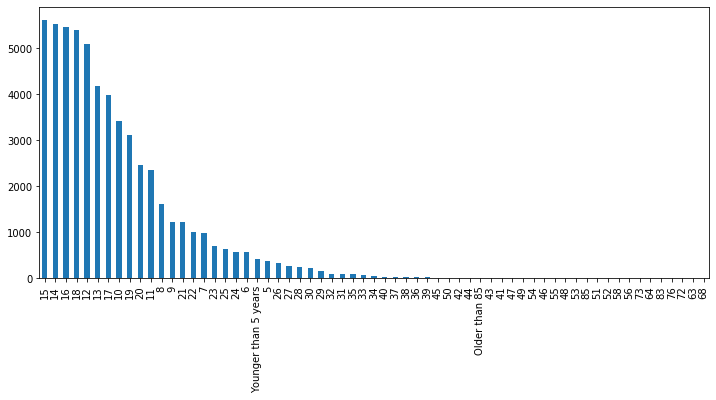

In [70]:
# We can also plot this distrubution to see how it looks
age_counts.plot.bar(figsize=(12, 5))

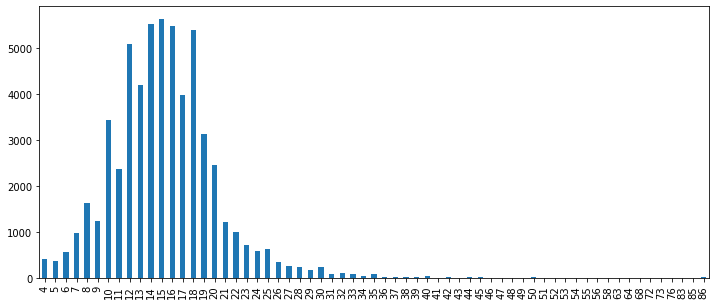

In [71]:
# Annoyingly, The counts don't seem to be ordered by age. We can fix that

from IPython.utils import io    # To be able to suppress outputs that automatically get printed

# Function to map an age string to a number
def map_age(age):
    print(age)
    if str.isnumeric(age):
        return int(age)
    elif age == 'Younger than 5 years':
        return 4
    elif age == 'Older than 85':
        return 86
    else:
        raise ValueError(f'We have a problem with the age {age}')

# The "with" clause is just so that Jupyter doesn't print out
# some unecessary outputs resulting from the command inside the clause.
with io.capture_output() as captured:
    # Map every one of the current incides using a custom function.
    # .apply(function) can also be used when doing this with Series
    # rather than an indexes type
    age_counts.index = age_counts.index.map(map_age);

# Sort by the index (which is the age in this case)
age_counts = age_counts.sort_index()

# Plot the distribution
age_counts.plot.bar(figsize=(12, 5))

### Groups based on how much they work

In [72]:
# First, we look at what the relevant column looks like
response_df['WorkWeekHrs'].head()

Respondent
1    50.0
2     NaN
3     NaN
4    40.0
5     NaN
Name: WorkWeekHrs, dtype: float64

In [73]:
# Again, let's define a function that
# we will use to map these to different categories

# Using apply function
def type_of_worker(x):
    if pd.isnull(x):
        return x
    elif x>40:
        return 'Hard-Worker'
    elif x==40:
        return ' Full-Time'
    else:
        return 'Part-Time'
    
# Add a new column to the response_df that will hold this worker type information
response_df['WorkerType'] = response_df['WorkWeekHrs'].apply(type_of_worker)
response_df.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,WorkerType
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,Hard-Worker
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,NaN
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4,Full-Time
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8,NaN


### Find the total amount of hours people have coded in their lifetime

In [74]:
# Convert the YearsCode column from string to numeric, setting errors to NaN
# (errors occur when the value is something like "Less than 1 year")
response_df['YearsCode'] = pd.to_numeric(response_df['YearsCode'], errors='coerce')

def lifetime_hours_coding(x):
    if x['YearsCode']:
        return x['YearsCode'] * x['WorkWeekHrs'] * 52

# We can use .apply(function) on a DataFrame rather than a Series,
# in which case we will have access to all the columns in our function.
response_df['LifetimeHoursCoding'] = response_df.apply(lifetime_hours_coding, axis=1)
response_df

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,WorkerType,LifetimeHoursCoding
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36.0,27,Hard-Worker,93600.0
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7.0,4,NaN,NaN
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4.0,NaN,NaN,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7.0,4,Full-Time,14560.0
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15.0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,NaN,...,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10.0,Less than 1 year,NaN,NaN
64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Do you think that "Hobbyist" is correlated with "WorkerType"
What is your hypothesis? We can see if there's a relationship using Pandas
and test out your prediction.

Strategy: Let's group the Hobbyist data by the WorkerType and just take the means.
In other words, what percentage of people in each WorkerType category are hobbyists, and does this percentage differ between WorkerType categories?

In [75]:
# We know that we need to group by the WorkerType and take
# the mean of the Hobbyist values, but what is the mean of Yes/No
# responses? Clearly, we have to transform these to numberic values.

import numpy as np

# Here, we are creating a new column HobbyistNumeric,
# setting all its rows where Hobbyist is 'No' to 0,
# and setting all its rows where Hobbyist is 'Yes' to 1
response_df['HobbyistNumeric'] = np.nan
response_df.loc[response_df['Hobbyist'] == 'No', 'HobbyistNumeric'] = 0
response_df.loc[response_df['Hobbyist'] == 'Yes', 'HobbyistNumeric'] = 1
response_df.head()

# Alternatively, we could have used another .apply(function) to assign
# this row based on the values of Hobbyist.

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,WorkerType,LifetimeHoursCoding,HobbyistNumeric
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36.0,27,Hard-Worker,93600.0,1.0
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7.0,4,NaN,NaN,0.0
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4.0,NaN,NaN,NaN,1.0
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7.0,4,Full-Time,14560.0,1.0
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15.0,8,NaN,NaN,1.0


In [76]:
# Now, just group by WorkerType and get the HobbyistNumeric means of each group
worker_type_hobbyists = response_df[['HobbyistNumeric', 'WorkerType']].groupby('WorkerType').mean()
worker_type_hobbyists

,HobbyistNumeric
WorkerType,
Full-Time,0.758760
Hard-Worker,0.780939
Part-Time,0.765105


Strangely enough, it actually seems like those who
work more hours are *more likely* to be hobbyists.
But, the difference isn't that great. We won't worry
about whether or not this difference is statistically
significant for now.

### How many people answered all of the questions?
We know someone didn't answer a question when the cell is filled with NaN

In [77]:
response_df_no_nans = response_df.dropna()    # Will drop any row that has a NaN
num_full_responses = len(response_df_no_nans)
num_responses = len(response_df)
print(f'{num_full_responses} out of {num_responses}')

4210 out of 64461


### Save the no-nans version of the dataset
Maybe you want to train a model just using the data
without any NaNs. We can write this dataframe to a new
csv file, or many other file formats.

In [78]:
response_df_no_nans.to_csv('survey_results_no_nans.csv')

## Index the data by 'Country' AND by 'Age1stCode'
Sometimes, you may want your index (row labels) to be composed
of multiple attributes. Think of this as the index being a tuple
of multiple values. This is called a MultiIndex in Pandas.

Example use-case: you will frequently be accessing survey
responses by both the country and the age at which they
started coding, so it makes sense to have these both
serve as the index together.

In [79]:
response_df_multi_index = response_df.set_index(['Country', 'Age1stCode'])
response_df_multi_index.head()

,,MainBranch,Hobbyist,Age,CompFreq,CompTotal,ConvertedComp,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,...,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,WorkerType,LifetimeHoursCoding,HobbyistNumeric
Country,Age1stCode,,,,,,,,,,,,,,,,,,,,,
Germany,13,I am a developer by profession,Yes,NaN,Monthly,NaN,NaN,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,...,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36.0,27,Hard-Worker,93600.0,1.0
United Kingdom,19,I am a developer by profession,No,NaN,NaN,NaN,NaN,Pound sterling,GBP,NaN,NaN,...,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7.0,4,NaN,NaN,0.0
Russian Federation,15,I code primarily as a hobby,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4.0,NaN,NaN,NaN,1.0
Albania,18,I am a developer by profession,Yes,25.0,NaN,NaN,NaN,Albanian lek,ALL,NaN,NaN,...,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7.0,4,Full-Time,14560.0,1.0
United States,16,"I used to be a developer by profession, but no...",Yes,31.0,NaN,NaN,NaN,NaN,NaN,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,...,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15.0,8,NaN,NaN,1.0


In [80]:
# Lookups can be more efficient if these indices are sorted
response_df_multi_index = response_df_multi_index.sort_index(level=[0, 1])    # Sort by country
response_df_multi_index

MainBranch  \
Country  Age1stCode                                                      
NaN      NaN                            I am a developer by profession   
         NaN                            I am a developer by profession   
         NaN                            I am a developer by profession   
         NaN         I am not primarily a developer, but I write co...   
         NaN                    I am a student who is learning to code   
...                                                                ...   
Zimbabwe 21                             I am a developer by profession   
         21                             I am a developer by profession   
         23          I am not primarily a developer, but I write co...   
         27                             I am a developer by profession   
         29                                I code primarily as a hobby   

                    Hobbyist   Age CompFreq  CompTotal  ConvertedComp  \
Country  Age1stCode                                                     
NaN      NaN             Yes   NaN      NaN        NaN            NaN   
         NaN             Yes   NaN      NaN        NaN            NaN   
         NaN             NaN   NaN      NaN        NaN            NaN   
         NaN              No   NaN      NaN        NaN            NaN   
         NaN             Yes   NaN      NaN        NaN            NaN   
...                      ...   ...      ...        ...            ...   
Zimbabwe 21               No   NaN      NaN        NaN            NaN   
         21              Yes  25.0  Monthly      300.0         3600.0   
         23              Yes   NaN   Yearly     7200.0         7200.0   
         27              Yes  33.0  Monthly    15000.0       180000.0   
         29              Yes   NaN      NaN        NaN            NaN   

                             CurrencyDesc CurrencySymbol  \
Country  Age1stCode                                        
NaN      NaN                          NaN            NaN   
         NaN                          NaN            NaN   
         NaN                          NaN            NaN   
         NaN                          NaN            NaN   
         NaN                          NaN            NaN   
...                                   ...            ...   
Zimbabwe 21            South African rand            ZAR   
         21          United States dollar            USD   
         23          United States dollar            USD   
         27          United States dollar            USD   
         29                           NaN            NaN   

                                           DatabaseDesireNextYear  \
Country  Age1stCode                                                 
NaN      NaN                                                  NaN   
         NaN                                                  NaN   
         NaN                                                  NaN   
         NaN                                                  NaN   
         NaN                                                  NaN   
...                                                           ...   
Zimbabwe 21          Microsoft SQL Server;MySQL;Oracle;PostgreSQL   
         21                                              Firebase   
         23                     Microsoft SQL Server;MySQL;Oracle   
         27                Microsoft SQL Server;PostgreSQL;SQLite   
         29                                      PostgreSQL;Redis   

                                               DatabaseWorkedWith  ...  \
Country  Age1stCode                                                ...   
NaN      NaN                                                  NaN  ...   
         NaN                                                  NaN  ...   
         NaN                                                  NaN  ...   
         NaN                                                  NaN  ...   
         NaN            

In [81]:
# Get responses from respondants from the Canada who began coding at 16 years old
response_df_multi_index.loc[('Canada', '16')].head()

MainBranch Hobbyist   Age CompFreq  \
Country Age1stCode                                                           
Canada  16          I am a developer by profession      Yes  46.0  Monthly   
        16          I am a developer by profession      Yes  26.0   Yearly   
        16          I am a developer by profession       No  56.0   Yearly   
        16          I am a developer by profession      Yes  27.0   Yearly   
        16          I am a developer by profession       No  60.0      NaN   

                    CompTotal  ConvertedComp     CurrencyDesc CurrencySymbol  \
Country Age1stCode                                                             
Canada  16           170000.0      1000000.0  Canadian dollar            CAD   
        16            74000.0        55967.0  Canadian dollar            CAD   
        16           100000.0        75631.0  Canadian dollar            CAD   
        16            80000.0        60505.0  Canadian dollar            CAD   
        16                0.0            NaN  Canadian dollar            CAD   

                     DatabaseDesireNextYear           DatabaseWorkedWith  ...  \
Country Age1stCode                                                        ...   
Canada  16          Firebase;MongoDB;Oracle    MongoDB;Oracle;PostgreSQL  ...   
        16            Elasticsearch;MongoDB  Microsoft SQL Server;Oracle  ...   
        16           Firebase;MongoDB;MySQL                MongoDB;MySQL  ...   
        16                              NaN                          NaN  ...   
        16             Microsoft SQL Server         Microsoft SQL Server  ...   

                                                       UndergradMajor  \
Country Age1stCode                                                      
Canada  16          Computer science, computer engineering, or sof...   
        16          Computer science, computer engineering, or sof...   
        16          Computer science, computer engineering, or sof...   
        16          Computer science, computer engineering, or sof...   
        16          Computer science, computer engineering, or sof...   

                   WebframeDesireNextYear     WebframeWorkedWith  \
Country Age1stCode                                                 
Canada  16               Express;React.js       Express;React.js   
        16                 Angular;Django  Angular;jQuery;Spring   
        16                        Express                Express   
        16                            NaN                    NaN   
        16           ASP.NET;ASP.NET Core                ASP.NET   

                                               WelcomeChange WorkWeekHrs  \
Country Age1stCode                                                         
Canada  16          Somewhat more welcome now than last year        37.0   
        16             A lot more welcome now than last year        37.5   
        16           Just as welcome now as I felt last year        40.0   
        16          Somewhat less welcome now than last year        40.0   
        16           Just as welcome now as I felt last year        30.0   

                   YearsCode YearsCodePro  WorkerType LifetimeHoursCoding  \
Country Age1stCode                                                          
Canada  16              20.0           20   Part-Time             38480.0   
        16               4.0            2   Part-Time              7800.0   
        16              40.0           30   Full-Time             83200.0   
        16              11.0            5   Full-Time             22880.0   
        16              45.0           40   Part-Time             70200.0   

                   HobbyistNumeric  
Country Age1stCode                  
Canada  16                     1.0  
        16                     1.0  
        16                     0.0  
        16                     1.0  
        16                     0.0  

[5 rows x 61 columns]

# Documentation
The [documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) (along with Googling what you want to achieve) are excellent ways to learn Pandas on the fly. What we've done is enough to get you started, but there is so much more you can do
with Pandas.